In [1]:
from Run_Designs import design_experiments, design_initial_experiments
import numpy as np
import pandas as pd
import scipy

1. C - List of number of categroies corresponding to each categorical variable
2. Nc - Number of categorical variables
3. Nx - Continuous variables
4. h - categorical
5. x - continuous
6. z - [h, x]

7. nDim - Nc + Nx
8. bounds - Lower and Upper bounds of both Catergorical variables and continuous variables

9. n_iter - Number of iterations to run the algorithm
10. initN - Number of intial data points
11. batch_size (b) - Number of experiments to be generated in each iteration

12. acq_type - Acquisition Type
13. Meas_Noise - Measurement Noise in the target 
14. Trade-off : Explorarion exploitation balance

### 1. Defining parameters of the system

In [2]:
bounds = [  {'name': 'XVIVO', 'type': 'continuous', 'domain': (0, 1)},
            {'name': 'DMEM', 'type': 'continuous', 'domain': (0, 1)},
            {'name': 'AR5', 'type': 'continuous', 'domain': (0, 1)},
         {'name': 'RPMI', 'type': 'continuous', 'domain': (0, 1)},]

constraints = [{'name': 'constr_1', 'constraint': 'x[:,0] + x[:,1] + x[:,2] + x[:,3]-1.0001'},
              {'name': 'constr_2', 'constraint': '-x[:,0] - x[:,1] - x[:,2] - x[:,3]+0.999'}] #for design space

constraint_function = scipy.optimize.LinearConstraint([[1, 1,1, 1]], [1], [1]) #For optimization function formulation

Nx = len(bounds)
initN = 12
Nc = 0
Niter = 1
batch_size = 3
approach_type = 'Co'
prob_type = 'Constrained'


data_param = {'Nx': Nx, 'Nc': Nc, 'nDim': Nc+Nx, 'bounds': bounds,'C': [],
              'Constrains': constraints, 'Constrains_function': constraint_function,
              'approach_type': approach_type, 'Meas_Noise': 0.3, 'trade_off': 3,
              'prob_type': prob_type, 'initN': initN, 'Meas_Noise': 0.1, 'trade_off': 3, 'batch_size': batch_size}

### 2. Creating the Initial Dataset
This function takes as input the 
1. parameter of the system defined above (data_param) - dictionary
2. number of initial experiments (initN) - scalar integer
3. output function file name - .csv
4. random seed and - scalar integer
5. File name to store background information for the modeling (including definitions in the data_param) - .pkl

In [3]:
random_seed = 0
background_model_parameter = '0_ModelBackground.pkl'
Exp0 = design_initial_experiments(data_param, initN, '0_pbmc_ExperimentalDesign.csv', random_seed, background_model_parameter)

### 3. Designing Subsequent Iterations of experiments

This function takes as input the following:
1. experimental data collected so far (design, result) - Both numpy arrays
3. number of experiments (batch_size) - Scalar
4. Method of optimization - 'thompson sampling' vs 'constant_liar'
5. File that has the task parameter summary (.pkl)
6. New file name to store the updated task parameters (.pkl)
7. the output file name (.csv)

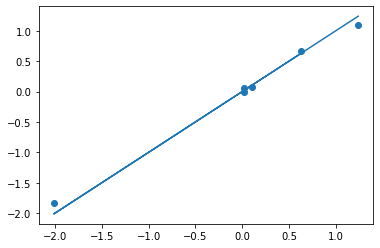

In [4]:
#read in the data file with all experiments planned until this iteration
design= pd.read_csv("./dummy_data/pbmc_test_design.csv").values

# read in the data file containing the corresponding target values
result =pd.read_csv("./dummy_data/pbmc_test_results.csv")['Average Viability [%]'].values.reshape(-1,1)

batch_size = 6
method = 'thompson_sampling'
output_file_name = 'pbmc_RoundX_ExperimentalDesign.csv'
background_model_parameter = '0_ModelBackground.pkl'
new_model_parameter = '1_ModelBackground.pkl'

z_next, fitted_gp = design_experiments(design, result, batch_size, method,background_model_parameter, 
                            new_model_parameter , output_file_name )